In [12]:
import pandas as pd
data_file=("Cardiac_Outcomes.xlsx")
all_sheets=pd.read_excel(data_file,sheet_name=None)
#to access sheet by name in excel
Hospital_data=all_sheets['Hospitalization_Discharge']
Cardiac_data=all_sheets['CardiacComplications']
Response_data=all_sheets['Responsivenes']
Patient_data=all_sheets['PatientHistory']
lab_data=all_sheets['Labs']
Demography_data=all_sheets['Demography']
Patientpre_data=all_sheets['Patient_Precriptions']
print(data_file)



Cardiac_Outcomes.xlsx


# 29) What percentage of those in a coma also have diabetes?

In [201]:
merged=pd.merge(Response_data, Patient_data , on='inpatient_number')
b= ((merged['GCS']<=8)&(merged['diabetes']==1)).sum()
print('diabetic patients in coma',b)
a=(merged['GCS']<=8).sum()
print('coma patiens',a)
c=(b/a)*100
d=f"{c:.2f}"
print('percentage of diabetic patients in coma',d)

diabetic patients in coma 2
coma patiens 19
percentage of diabetic patients in coma 10.53


# 3) Add a calculated column called Discharge date into the Hospitalization_Discharge using the information already available to you

In [202]:
Hospital_data['discharge_date']=Hospital_data['Admission_date']+pd.to_timedelta(Hospital_data['dischargeDay'],unit='D')
Hospital_data
                                                                                


,inpatient_number,DestinationDischarge,admission_ward,admission_way,discharge_department,visit_times,respiratory_support,oxygen_inhalation,dischargeDay,Admission_date,...,re_admission_within_28_days,death_within_3_months,re_admission_within_3_months,death_within_6_months,re_admission_within_6_months,time_of_death__days_from_admission,readmission_time_days_from_admission,return_to_emergency_department_within_6_months,time_to_emergency_department_within_6_months,discharge_date
0,857781,Home,Cardiology,NonEmergency,Cardiology,1,NaN,OxygenTherapy,11,2017-01-24,...,0,0,0,0,0,NaN,NaN,0.0,NaN,2017-02-04
1,743087,Home,Cardiology,NonEmergency,Cardiology,1,NaN,OxygenTherapy,8,2017-05-05,...,0,0,0,0,0,NaN,NaN,0.0,NaN,2017-05-13
2,866418,Home,Cardiology,NonEmergency,Cardiology,2,NaN,OxygenTherapy,5,2016-11-18,...,0,0,0,0,0,NaN,NaN,0.0,NaN,2016-11-23
3,775928,Home,Cardiology,Emergency,Cardiology,1,NaN,OxygenTherapy,11,2017-10-02,...,1,0,1,0,1,NaN,19.0,1.0,19.0,2017-10-13
4,810128,Home,Cardiology,NonEmergency,Cardiology,1,NaN,OxygenTherapy,5,2019-11-17,...,0,0,0,0,0,NaN,NaN,0.0,NaN,2019-11-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,740689,HealthcareFacility,GeneralWard,Emergency,GeneralWard,1,NaN,OxygenTherapy,5,2016-02-07,...,0,0,0,0,0,NaN,NaN,0.0,NaN,2016-02-12
2004,734280,HealthcareFacility,GeneralWard,Emergency,GeneralWard,1,NaN,OxygenTherapy,8,2017-03-29,...,0,0,0,0,0,NaN,NaN,0.0,NaN,2017-04-06
2005,781004,HealthcareFacility,Cardiology,Emergency,Cardiology,1,NaN,OxygenTherapy,14,2018-01-22,...,0,0,1,0,1,NaN,76.0,1.0,76.0,2018-02-05
2006,744870,Unknown,Cardiology,NonEmergency,Cardiology,1,IMV,OxygenTherapy,1,2019-11-27,...,0,1,0,1,0,1.0,NaN,0.0,NaN,2019-11-28


# 26) Create a column that randomly generates an age between the age group given for each patient. What was the average age of the patients?

In [203]:
def Random_Age(age):
 return pd.Series(age.split("-", 1))
Demography_data[['Age1', 'Age2']] = Demography_data['ageCat'].apply(Random_Age)  
Demography_data['Age'] = [np.random.randint(s, e) for s,e in zip(Demography_data['Age1'], Demography_data['Age2'])]
del Demography_data['Age1']
del Demography_data['Age2']
Avg=Demography_data['Age'].mean().round()
print("Average age of the patients:",Avg)
Demography_data

Average age of the patients: 74.0


,inpatient_number,gender,weight,height,BMI,occupation,ageCat,Age,year_of_birth
0,857781,Male,50.0,1.64,18.590125,UrbanResident,69-79,71,1949
1,743087,Female,51.0,1.63,19.195303,UrbanResident,69-79,74,1953
2,866418,Male,70.0,1.70,24.221453,farmer,59-69,59,1965
3,775928,Male,65.0,1.70,22.491349,UrbanResident,69-79,76,1952
4,810128,Female,76.0,1.55,31.633715,UrbanResident,69-79,76,1947
...,...,...,...,...,...,...,...,...,...
2003,740689,Female,35.0,1.50,15.555556,Others,79-89,79,1942
2004,734280,Female,50.0,1.55,20.811655,UrbanResident,79-89,86,1939
2005,781004,Male,75.0,1.70,25.951557,UrbanResident,39-49,43,1978
2006,744870,Male,40.0,1.50,17.777778,UrbanResident,49-59,52,1969


# 51) Display a violin chart to show distribution of Pulse Rate against age.

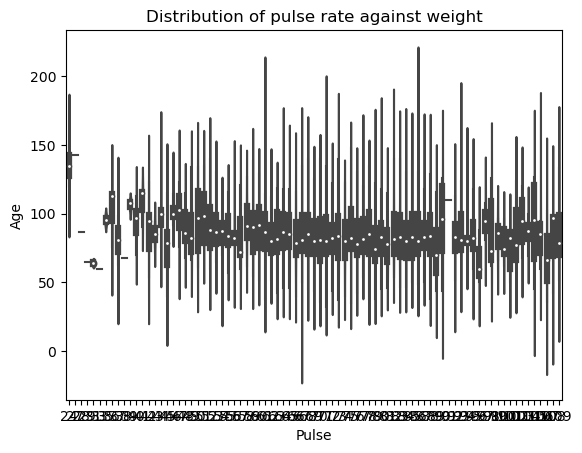

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt
def Random_Age(age):
 return pd.Series(age.split("-", 1))
Demography_data[['Age1', 'Age2']] = Demography_data['ageCat'].apply(Random_Age)  
Demography_data['Age'] = [np.random.randint(s, e) for s,e in zip(Demography_data['Age1'], Demography_data['Age2'])]
merged=pd.merge(lab_data,Demography_data, on='inpatient_number')
#concated=pd.concat([lab_data,Demography_data],axis=1)
sns.violinplot(x='Age',y='pulse',data=merged)
plt.xlabel("Pulse")
plt.ylabel("Age")
plt.title("Distribution of pulse rate against weight")
plt.show()

# 27) Using the age column generated in Q.26, calculate year of birth for each patient

In [205]:
def Random_Age(age):
 return pd.Series(age.split("-", 1))
Demography_data[['Age1', 'Age2']] = Demography_data['ageCat'].apply(Random_Age)  
Demography_data['Age'] = [np.random.randint(s, e) for s,e in zip(Demography_data['Age1'], Demography_data['Age2'])]
del Demography_data['Age1']
del Demography_data['Age2']
current=pd.Timestamp.now().year
Demography_data['year_of_birth']=current-Demography_data['Age']
Demography_data

,inpatient_number,gender,weight,height,BMI,occupation,ageCat,Age,year_of_birth
0,857781,Male,50.0,1.64,18.590125,UrbanResident,69-79,76,1948
1,743087,Female,51.0,1.63,19.195303,UrbanResident,69-79,76,1948
2,866418,Male,70.0,1.70,24.221453,farmer,59-69,61,1963
3,775928,Male,65.0,1.70,22.491349,UrbanResident,69-79,72,1952
4,810128,Female,76.0,1.55,31.633715,UrbanResident,69-79,78,1946
...,...,...,...,...,...,...,...,...,...
2003,740689,Female,35.0,1.50,15.555556,Others,79-89,85,1939
2004,734280,Female,50.0,1.55,20.811655,UrbanResident,79-89,80,1944
2005,781004,Male,75.0,1.70,25.951557,UrbanResident,39-49,47,1977
2006,744870,Male,40.0,1.50,17.777778,UrbanResident,49-59,49,1975
